# **Clustering Type de ressources**


>Nous allons procéder ici aussi à un clustering des établissements sur les colonnes suivantes : 
>- TpRess_ManuelNum : *`est-ce que le manuel scolaire est disponible sous forme numérique`*
>- TpRess_AnimScienLogiSimu : *`Les animations scientifiques et/ou logiciels de simulation sont l'un des types de ressources mises à la disposition des élèves`*
>- TpRess_Bdd : *`Les banques de documents multimédias (vidéos, podcasts, textes, cartes, animations, etc.) sont l'un des types de ressources mises à la disposition des élèves.`*
>- TpRess_LogiOutils : *`Les logiciels outils (géométrie, indexage, lexicographie, cartographie, etc.) sont l'un des types de ressources mises à la disposition des élèves`*
>- TpRess_OuvRef : *`Les ouvrages de référence interactifs (atlas, dictionnaire, encyclopédie...) sont l'un des types de ressources mises à la disposition des élèves`*
>- TpRess_ResEntrainement : *`Les ressources pour s'entraîner sont l'un des types de ressources mises à la disposition des élèves`*
>- TpRess_Autres : *`D'autres types de ressources sont mis à la disposition des élèves`*


>Le but va être de réduire ces 7 colonnes en une seule avec plusieurs modalités, pour faciliter l'analyse globale. Nous allons procèder comme nous avons pu le faire précedemment. Nous allons utiliser l'algorithme de ``KMeans`` pour procéder à une classification non supervisée pour voir si des groupes se dégagent 



### *Import des bibliothèques*

In [1]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import prince as pc

# import image module
from IPython.display import Image
import kaleido
import io
from PIL import Image as ImagePIL

### *Import du fichier*

In [2]:
df = pd.read_csv('../data/lycee-college/fr-en-etic_2d.csv', sep=';')

#on garde les données les plus récentes, donc 2019
df = df.loc[df["Millesime"] == 2019]

#On consulte les colonnes existantes
df.columns

Index(['Code_UAI', 'Millesime', 'Code_nature', 'nature_uai', 'typ_etab',
       'Academie', 'Departement', 'NbEleve', 'NbEnseignant',
       'SiEtabCentreRessource', 'SiProjetNumEcole', 'SiEntDisponible',
       'SiProjEtabIntegreENT', 'Maint_PersCollect', 'Maint_PrestaExt',
       'Maint_PersonnelEducNatHsEtab', 'Maint_PersonnelEtab',
       'Maint_AutreNeSaitPas', 'Maint_Personne', 'NbRessourceEdit',
       'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu', 'TpRess_Bdd',
       'TpRess_LogiOutils', 'TpRess_OuvRef', 'TpRess_ResEntrainement',
       'TpRess_Autres', 'TpRess_aucune', 'ServInt_NoteElev', 'ServInt_AbsElev',
       'ServInt_EdtElevCls', 'ServInt_CahierTxt', 'ServInt_DocRessPeda',
       'ServInt_AgdActuEtab', 'ServInt_PlatApp', 'ServInt_Autres',
       'ServInt_aucun', 'NbTerminaux', 'NbTablette', 'NbTablettePC',
       'NbMicroMoins5', 'NbMicroPortable', 'NbPortAffEl', 'NbPortAffEns',
       'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI', 'propClassesAvecTBI',
       'NbVideoProj',

### *Traitement du fichier*

On va fixer l'index et ensuite supprimer toutes les colonnes qui seront inutiles pour cette analyse. On supprime également les établissement pour lesquels il y a des `NaN` car cela va poser problème lors de la classification.

In [3]:
df_ressources = df.set_index('Code_UAI')

#On supprime les colonnes inutiles
df_ressources.drop(columns=['Millesime', 'Code_nature', 'nature_uai', 'typ_etab',
       'Academie', 'Departement', 'NbEleve', 'NbEnseignant',
       'SiEtabCentreRessource', 'SiProjetNumEcole', 'SiEntDisponible',
       'SiProjEtabIntegreENT', 'Maint_PersCollect', 'Maint_PrestaExt',
       'Maint_PersonnelEducNatHsEtab', 'Maint_PersonnelEtab',
       'Maint_AutreNeSaitPas', 'Maint_Personne', 'NbRessourceEdit',
       'ServInt_NoteElev', 'ServInt_AbsElev',
       'ServInt_EdtElevCls', 'ServInt_CahierTxt', 'ServInt_DocRessPeda',
       'ServInt_AgdActuEtab', 'ServInt_PlatApp', 'ServInt_Autres',
       'ServInt_aucun', 'NbTerminaux', 'NbTablette', 'NbTablettePC',
       'NbMicroMoins5', 'NbMicroPortable', 'NbPortAffEl', 'NbPortAffEns',
       'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI', 'propClassesAvecTBI',
       'NbVideoProj', 'NbClassMobile', 'NbLecteurMpx', 'NbImpr3D',
       'AccWeb_RTC', 'AccWeb_CableFibreOptique', 'AccWeb_ADSL',
       'AccWeb_AutresHautDebit', 'AccWeb_NeSaitPas', 'AccWeb_Aucun',
       'DebitWeb', 'SiWifi', 'SalleInternet', 'PostesInfoElvHorsCours',
       'SiPareFeuEtab', 'SiOuifiltrageWeb', 'ControlePosteriori',
       'SiCharteUsageWeb', 'Diffch_AnnexeeRI',
       'Diffch_DossierRentreeEnseignants', 'Diffch_CRConseilAdmin',
       'Diffch_DiffusionParents', 'Diffch_Autres', 'AccesParentCharte',
       'ElvAuthentif', 'SiVisioConferenc', 'SiEntUtilise',
       'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp',
       'TypeMatHandi_Autre', 'Code_region', 'Libelle_region'], inplace=True)


#On supprime les lignes avec des valeurs manquantes
df_ressources.dropna(inplace=True)

On vérifie que tout s'est bien supprimé

In [4]:
df_ressources.head()

,TpRess_ManuelNum,TpRess_AnimScienLogiSimu,TpRess_Bdd,TpRess_LogiOutils,TpRess_OuvRef,TpRess_ResEntrainement,TpRess_Autres,TpRess_aucune
Code_UAI,,,,,,,,
0810016C,oui,oui,oui,oui,oui,non,oui,non
0810026N,non,oui,oui,oui,oui,non,oui,non
0810041E,oui,non,oui,oui,oui,oui,oui,non
0810124V,oui,oui,oui,oui,oui,non,oui,non
0810125W,oui,non,non,oui,non,oui,non,non


On va procéder ensuite au renommage des colonnes

In [5]:
old_columns = df_ressources.columns

for column in old_columns:
    df_ressources.rename(columns={column: column.replace('TpRess_', '').lower()}, inplace=True)

df_ressources.columns

Index(['manuelnum', 'animscienlogisimu', 'bdd', 'logioutils', 'ouvref',
       'resentrainement', 'autres', 'aucune'],
      dtype='object')

On va procèder maintenant à la transformation des modalités en valeurs numériques (1 pour "oui" et 0 pour "non"). Cette transformation est nécessaire pour pouvoir faire du clustering et faire une ACP à la fin pour avoir une représentation.

In [6]:
for column in df_ressources.columns:
    df_ressources[column] = df_ressources[column].replace({'oui': 1, 'non': 0})
    df_ressources[column] = df_ressources[column].astype('float64')

df_ressources.head()

,manuelnum,animscienlogisimu,bdd,logioutils,ouvref,resentrainement,autres,aucune
Code_UAI,,,,,,,,
0810016C,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
0810026N,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
0810041E,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
0810124V,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
0810125W,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Corrélation

Avant de faire de la classification, nous allons voir si il existe une corrélation entre les différentes variables qu'on a là

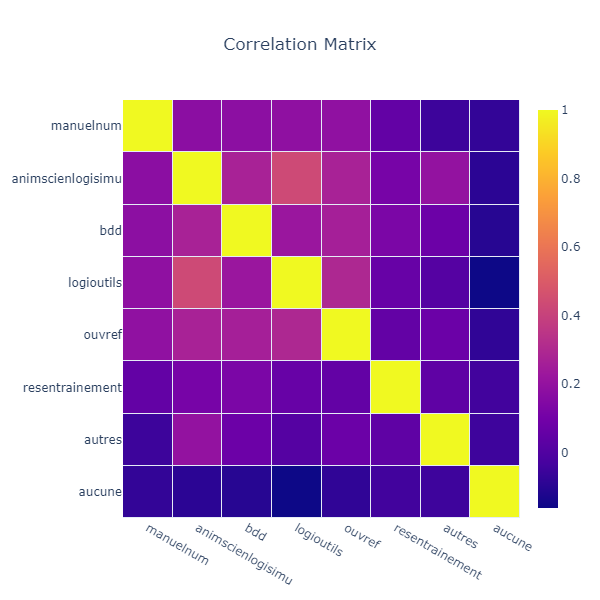

In [7]:
columns_names = df_ressources.columns

heat = go.Heatmap(
    z = df_ressources.corr(),
    x = columns_names,
    y = columns_names,
    xgap = 1, ygap = 1,
    colorbar_thickness=20,
    colorbar_ticklen=3,
    hovertext = df_ressources.corr(),
    hoverinfo='text'
)

layout = go.Layout(
    title_text= "Correlation Matrix",
    title_x = 0.5,
    width=600, height=600,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed'
)

fig = go.Figure(data=[heat], layout=layout)
Image(fig.to_image(format="png", engine="kaleido", width=600, height=600))
#fig.show()

On voit qu'il n'y a pas tellement de corrélation entre les variables qu'on a prises ici.

### Clustering

On peut maintenant passer au Clustering avec l'algorithme de ``KMeans``.

In [8]:
km_ressources = KMeans(
    n_clusters=4, 
    random_state=42,
    init='k-means++',
    max_iter=3600,
    n_init=20
)

y_km_ressources = km_ressources.fit_predict(df_ressources)

resultat = pd.DataFrame(km_ressources.cluster_centers_, columns=km_ressources.feature_names_in_)

resultat

,manuelnum,animscienlogisimu,bdd,logioutils,ouvref,resentrainement,autres,aucune
0,0.337349,0.289157,0.385542,0.698795,0.277108,3.493976e-01,2.530120e-01,1.204819e-02
1,0.887324,0.873239,0.950704,0.978873,0.880282,4.507042e-01,3.330669e-16,-8.673617e-19
2,0.796117,0.941748,0.922330,0.980583,0.873786,1.000000e+00,1.000000e+00,-1.734723e-18
3,0.697248,0.926606,0.908257,0.954128,0.807339,1.110223e-16,1.000000e+00,-1.734723e-18


On va convertir ces valeurs numériques en "oui" et "non" pour pouvoir comprendre le comportement moyen qui se dégage d'un cluster. Cela sera plus facile à comprendre et interprèter

In [9]:
def change_value(row):
    if(row > 0.5):
        return 1
    else:
        return 0


for column in resultat.columns:
    resultat[column] = resultat[column].apply(change_value)
    resultat[column] = resultat[column].replace({1: 'oui', 0: 'non'})
    resultat[column] = resultat[column].astype(str)


resultat

,manuelnum,animscienlogisimu,bdd,logioutils,ouvref,resentrainement,autres,aucune
0,non,non,non,oui,non,non,non,non
1,oui,oui,oui,oui,oui,non,non,non
2,oui,oui,oui,oui,oui,oui,oui,non
3,oui,oui,oui,oui,oui,non,oui,non


Après plusieurs essais, avec plusieurs valeurs pour le nombre de clusters à trouver, nous avons pu voir que les meilleurs paramètres mis au dessus dans la fonction du KMeans est celui mis actuellement. Il permet de discrétiser en 4 modalités ces 8 colonnes. Si on augmente le nombre de clusters, on a des classes qui se ressemblent, et si on le diminue les classes ne sont pas précises. 
Nous avons donc ici 4 modalités pour la nouvelle classe "ressources mises en place" :
- "*`Très bien`*" : la classe 1
- "*`Bien`*" : la classe 3
- "*`Assez bien`*" : la classe 0
- "*`Mauvais`*" : la classe 2


On va ensuite procéder à une ACP pour voir si on a une bonne découpe des clusters et avoir une représentation physique qui va plus nous parler.

On ajoute à chaque individu sa classe.

In [10]:
df_ressources['cluster'] = y_km_ressources
df_ressources['cluster'] = df_ressources['cluster'].astype(str)
df_ressources.head()

,manuelnum,animscienlogisimu,bdd,logioutils,ouvref,resentrainement,autres,aucune,cluster
Code_UAI,,,,,,,,,
0810016C,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3
0810026N,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3
0810041E,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2
0810124V,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3
0810125W,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


Après avoir bien mis en forme nos données, on peut passer à une ACP. Nous allons d'abord faire une ACP à l'aide de la classe ``PCA`` fournie par ```sklearn```

In [11]:
pca_ressources = PCA(n_components=2)

components = pca_ressources.fit_transform(df_ressources.drop(columns=['cluster']))

fig = px.scatter(components, x=0, y=1, color=df_ressources["cluster"], title="Coordonnées des individus", labels={"0": "PC1", "1": "PC2"})
Image(fig.to_image(format="png", engine="kaleido", width=1000, height=600))
#fig.show()

print("La variance expliquée par le premier axe est de : ", pca_ressources.explained_variance_ratio_[0]*100, "%"," et celle par le second axe est de : ", pca_ressources.explained_variance_ratio_[1]*100, "% ")
print("La variance totale est de : ", pca_ressources.explained_variance_ratio_.sum()*100, "%")

La variance expliquée par le premier axe est de :  26.51137119033107 %  et celle par le second axe est de :  19.693530326518697 % 
La variance totale est de :  46.20490151684976 %


On voit que les clusters ici sont mélangés. Ceci peut être expliqué par la variance totale expliquée par ces deux dimensions. On a seulement 46.6 % de l'information. Il faut donc manipuler avec des pincettes ce graphique pour juger le découpage en clusters.

In [12]:
pca_ressources = pc.PCA(
    n_components=2,
    random_state=0,
    n_iter=100,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    engine='auto',
    check_input=True
)

pca_ressources = pca_ressources.fit(df_ressources.drop(columns=['cluster']))

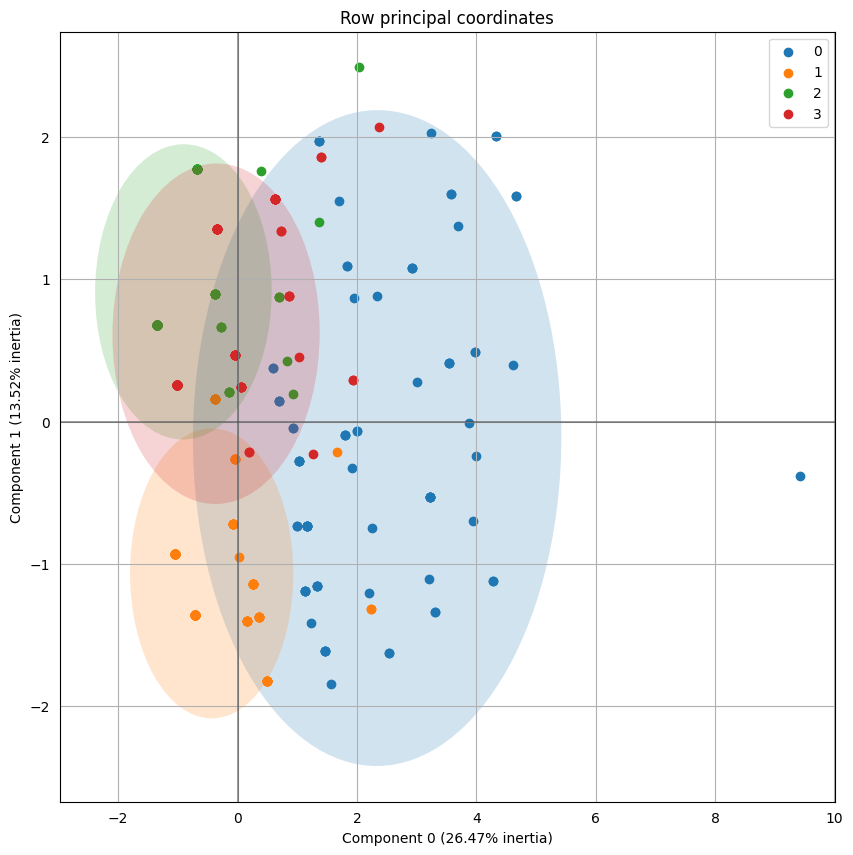

In [13]:
ax_ressources = pca_ressources.plot_row_coordinates(
    df_ressources.drop(columns=['cluster']),
    ax=None,
    figsize=(10, 10),
    x_component=0,
    y_component=1,
    labels=None,
    color_labels=df_ressources['cluster']
)

-------------------------------

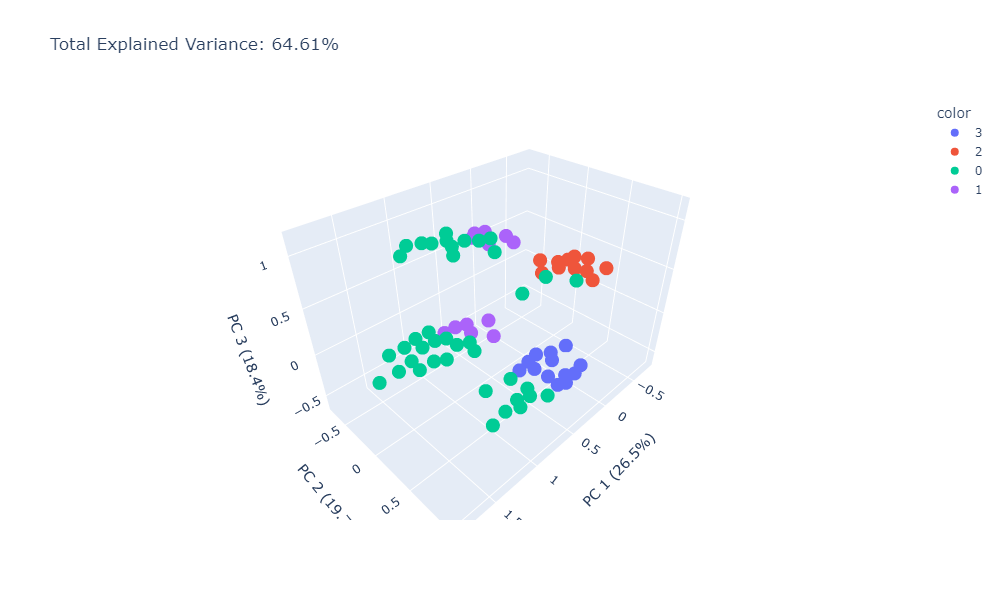

In [14]:
pca = PCA(n_components=3)

components = pca.fit_transform(df_ressources.drop(columns=['cluster']))

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_3d(components, x=0, y=1, z=2, color=df_ressources["cluster"], title=f'Total Explained Variance: {total_var:.2f}%', labels=labels)
Image(fig.to_image(format="png", engine="kaleido", width=1000, height=600))

#fig.show()

En passant à une visualisation 3D qui est souvent dure à interpréter, nous passons à une variance totale expliquée de 64.52%. On voit que la séparation des clusters est meilleure qu'en 2 dimensions. On a recouru à un graphique en 3 dimensions pour nous assurer que les clusters ont bien été faits et avoir une représentation graphique 

### Création de la colonne `Accés aux ressources`

Nous allons maintenant procéder à la création de cette colonne pour ensuite l'enregistrer dans un csv qui pourra être utilisé dans l'analyse générale

In [15]:
df_ressources_final = pd.DataFrame(df_ressources.cluster.astype(str).replace({"0":"Assez bien", "1": "Très bien", "3": "Bien", "2": "Mauvais"}))
df_ressources_final.rename(columns={"cluster": "acces_ressources"}, inplace=True)

df_ressources_final.head()

,acces_ressources
Code_UAI,
0810016C,Bien
0810026N,Bien
0810041E,Mauvais
0810124V,Bien
0810125W,Assez bien


On va stocker cela dans un fichier csv

In [16]:
df_ressources_final.to_csv("../data/analyses/acces_ressources.csv", index=True, sep=';')